In [171]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import scipy.stats

df = pd.read_csv('turnstile_data_master_with_weather.csv')

<AxesSubplot:>

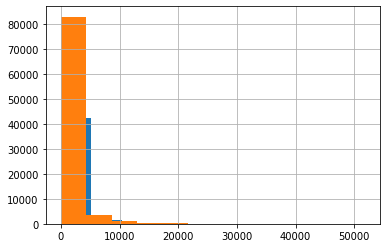

In [6]:
# Generating dataframes for rain/no rain conditions
df_rain = df[df['rain']==1]
df_clear = df[df['rain']==0]

df_rain['ENTRIESn_hourly'].hist()
df_clear['ENTRIESn_hourly'].hist()
# Histogram shows that the data in both dataframes is not normally distributed, which keeps us from using tests like Welch's T-test.
# This could also be confirmed by running the Shapiro-Wilk Test

In [10]:
# Mean entries for rainy and clear days
entries_mean_rain = np.mean(df_rain['ENTRIESn_hourly'])
entries_mean_clear = np.mean(df_clear['ENTRIESn_hourly'])
# Mann whitney U test 
results = scipy.stats.mannwhitneyu(df_rain['ENTRIESn_hourly'], df_clear['ENTRIESn_hourly'])
# Results indicate that samples are significantly different
results

MannwhitneyuResult(statistic=1924409167.0, pvalue=0.024940392294493356)

In [16]:
a = df.mean()
type(a)

pandas.core.series.Series

In [78]:
df.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


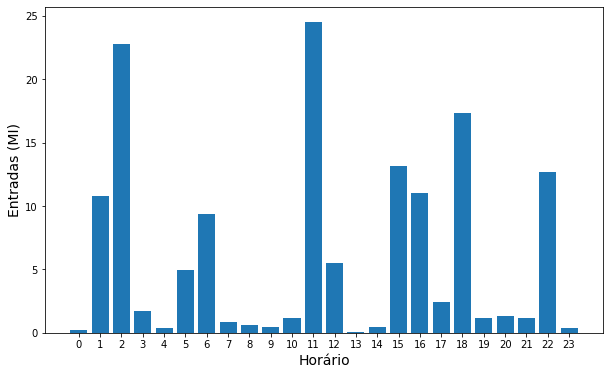

In [75]:
plt.figure(figsize=(10,6))
horario = df['Hour'].unique()
entrada = df.groupby('Hour').sum()['ENTRIESn_hourly']
entrada
plt.bar(horario, entrada/1000000, width = 0.8)
plt.xlabel('Horário', fontsize = 14)
plt.ylabel('Entradas (MI)', fontsize = 14)
plt.xticks(horario)
plt.show()

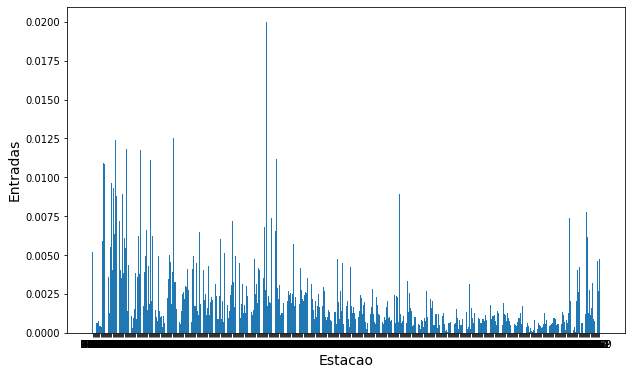

In [91]:
plt.figure(figsize=(10,6))
entrada = df.groupby('UNIT').sum()['ENTRIESn_hourly']
estacoes = df['UNIT'].unique()
plt.bar(estacoes, entrada/total, width = 0.8)
plt.xlabel('Estacao', fontsize = 14)
plt.ylabel('Entradas', fontsize = 14)
total = entrada.sum()


In [92]:
df['ENTRIESn_hourly'].max()

51839.0

In [121]:
#Estacao com maior fluxo de entradas/hora
df[df['ENTRIESn_hourly']==df['ENTRIESn_hourly'].max()]
#df[(df['ENTRIESn_hourly']==df['ENTRIESn_hourly'].min())]

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
80304,80304,R170,2011-05-19,21:00:00,21,REGULAR,51839.0,38793.0,30.05,64.0,...,61.0,30.0,1.0,1.0,4.0,60.0,68.0,75.0,0.07,0.0


In [173]:
#Menor pico de entradas
maximo = df.groupby('Hour').max()
maximo[maximo['ENTRIESn_hourly'] == maximo['ENTRIESn_hourly'].min()]
df[(df['ENTRIESn_hourly'] == maximo['ENTRIESn_hourly'].min()) & (df['Hour'] == 3)]



,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
122164,122164,R544,2011-05-28,03:33:11,3,REGULAR,3194.0,446.0,30.09,68.0,...,65.0,30.03,0.0,0.0,5.0,67.0,76.0,84.0,0.0,0.0


<BarContainer object of 465 artists>

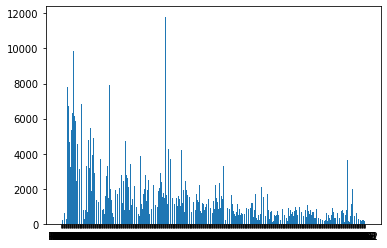

In [211]:
#Estacoes com maior e menor variabilidade no fluxo de entrada de passageiros por hora
std = df.groupby('UNIT').std()['ENTRIESn_hourly'].reset_index()
std[std['ENTRIESn_hourly'] == std['ENTRIESn_hourly'].min()]
std[std['ENTRIESn_hourly'] == std['ENTRIESn_hourly'].max()]
plt.bar(std['UNIT'], std['ENTRIESn_hourly'])

In [212]:
#SAME
var_entry_station = df.groupby('UNIT').std()['ENTRIESn_hourly']
var_entry_station = var_entry_station.reset_index().add_suffix('_std')
var_entry_station[var_entry_station['ENTRIESn_hourly_std']==var_entry_station['ENTRIESn_hourly_std'].max()]


,UNIT_std,ENTRIESn_hourly_std
159,R170,11812.027096
